In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electricity/electricity-normalized.csv


Data Exploration and Preprocessing:

Data Cleaning


Exploratory Data Analysis (EDA)


Feature Engineering


Normalization/Scaling

In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/electricity/electricity-normalized.csv')

print(df.head())

   date  day    period  nswprice  nswdemand  vicprice  vicdemand  transfer  \
0   0.0    2  0.000000  0.056443   0.439155  0.003467   0.422915  0.414912   
1   0.0    2  0.021277  0.051699   0.415055  0.003467   0.422915  0.414912   
2   0.0    2  0.042553  0.051489   0.385004  0.003467   0.422915  0.414912   
3   0.0    2  0.063830  0.045485   0.314639  0.003467   0.422915  0.414912   
4   0.0    2  0.085106  0.042482   0.251116  0.003467   0.422915  0.414912   

  class  
0    UP  
1    UP  
2    UP  
3    UP  
4  DOWN  


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       45312 non-null  float64
 1   day        45312 non-null  int64  
 2   period     45312 non-null  float64
 3   nswprice   45312 non-null  float64
 4   nswdemand  45312 non-null  float64
 5   vicprice   45312 non-null  float64
 6   vicdemand  45312 non-null  float64
 7   transfer   45312 non-null  float64
 8   class      45312 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 3.1+ MB
None


In [4]:
df['class'] = df['class'].apply(lambda x: 1 if x == 'UP' else 0)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       45312 non-null  float64
 1   day        45312 non-null  int64  
 2   period     45312 non-null  float64
 3   nswprice   45312 non-null  float64
 4   nswdemand  45312 non-null  float64
 5   vicprice   45312 non-null  float64
 6   vicdemand  45312 non-null  float64
 7   transfer   45312 non-null  float64
 8   class      45312 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 3.1 MB
None


**Data Cleaning**

In [6]:
# missing values
print(df.isnull().sum())

date         0
day          0
period       0
nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
class        0
dtype: int64


In [7]:
print(df.duplicated().sum())

0


**Exploratory Data Analysis (EDA)**
Visualising and understanding the distribution of the variables and their relationships.
we are going to use heatmap which used for correlation matrix


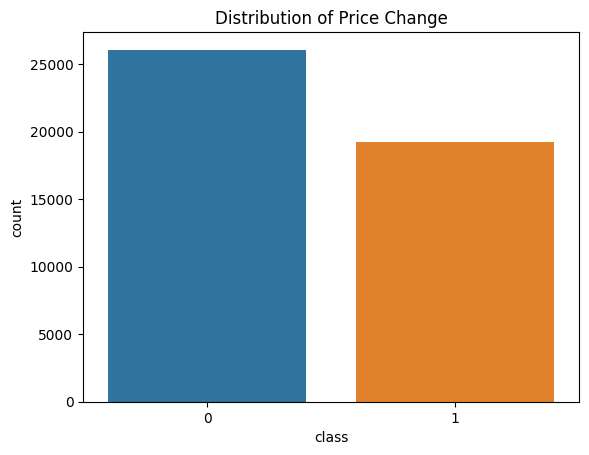

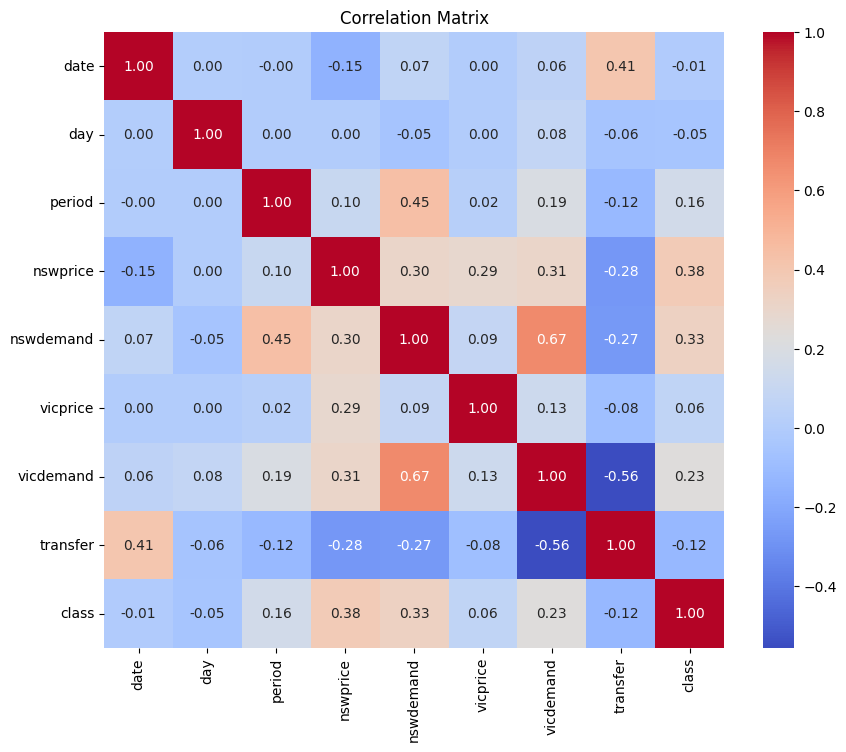

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='class', data=df)
plt.title('Distribution of Price Change')
plt.show()

# Plot correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


The correlation coefficient ranges from -1 to 1:

1: Perfect positive correlation
0: No correlation
-1: Perfect negative correlation


**Feature Engineering**

we are creating some additional features to improve the model.

In [9]:
df.columns

Index(['date', 'day', 'period', 'nswprice', 'nswdemand', 'vicprice',
       'vicdemand', 'transfer', 'class'],
      dtype='object')

 lag features can help the model to understand how past demand influences current demand and price changes.

In [10]:
'''

nswdemand: The electricity demand in NSW, normalized between 0 and 1.
vicdemand: The electricity demand in Victoria, normalized between 0 and 1.

'''

df['day_period'] = df['day'] * df['period']

df['nsw_demand_lag'] = df['nswdemand'].shift(1) #nsw_demand_lag: Contains the demand from the previous 30 minutes for New South Wales.
df['vic_demand_lag'] = df['vicdemand'].shift(1) #vic_demand_lag: Contains the demand from the previous 30 minutes for Victoria.

df = df.dropna()


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45311 entries, 1 to 45311
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            45311 non-null  float64
 1   day             45311 non-null  int64  
 2   period          45311 non-null  float64
 3   nswprice        45311 non-null  float64
 4   nswdemand       45311 non-null  float64
 5   vicprice        45311 non-null  float64
 6   vicdemand       45311 non-null  float64
 7   transfer        45311 non-null  float64
 8   class           45311 non-null  int64  
 9   day_period      45311 non-null  float64
 10  nsw_demand_lag  45311 non-null  float64
 11  vic_demand_lag  45311 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 4.5 MB


In [12]:
df.head(3)

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class,day_period,nsw_demand_lag,vic_demand_lag
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,1,0.042554,0.439155,0.422915
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,1,0.085106,0.415055,0.422915
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,1,0.127660,0.385004,0.422915


In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['class']) #features
y = df['class']#target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
'''

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


model_lr = LogisticRegression(class_weight='balanced')
model_lr.fit(X_train, y_train)

'''



"\n\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import classification_report\n\n\nmodel_lr = LogisticRegression(class_weight='balanced')\nmodel_lr.fit(X_train, y_train)\n\n"

In [15]:
'''

y_pred_lr = model_lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

model_rf = RandomForestClassifier(class_weight='balanced')
model_rf.fit(X_train, y_train)

'''

"\n\ny_pred_lr = model_lr.predict(X_test)\nprint(classification_report(y_test, y_pred_lr))\n\nfrom sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier\nfrom sklearn.svm import SVC\nfrom sklearn.neural_network import MLPClassifier\n\nmodel_rf = RandomForestClassifier(class_weight='balanced')\nmodel_rf.fit(X_train, y_train)\n\n"

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)


y_pred_lr = model_lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.75      0.87      0.80      5245
           1       0.77      0.59      0.67      3818

    accuracy                           0.75      9063
   macro avg       0.76      0.73      0.74      9063
weighted avg       0.75      0.75      0.75      9063



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)

model_svm = SVC()
model_svm.fit(X_train, y_train)


SVC()

In [19]:
# Predict and evaluate
for model, name in zip([model_lr, model_rf, model_gb, model_svm], 
                       ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM']):
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.80      5245
           1       0.77      0.59      0.67      3818

    accuracy                           0.75      9063
   macro avg       0.76      0.73      0.74      9063
weighted avg       0.75      0.75      0.75      9063


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      5245
           1       0.89      0.86      0.88      3818

    accuracy                           0.90      9063
   macro avg       0.90      0.89      0.90      9063
weighted avg       0.90      0.90      0.90      9063


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      5245
           1       0.83      0.77      0.80      3818

    accuracy                           0.84      9063
   m

Precision: Measures how many of the predicted positive cases are actually positive.


Recall: Measures how many of the actual positive cases were correctly predicted.


F1-Score: A combination of precision and recall, giving a single metric to assess performance.


Support: The number of actual occurrences of each class in the dataset.


Accuracy: The overall percentage of correct predictions.


Macro Average: The average of precision, recall, and F1-Score across classes, treating all classes equally.

